In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import f_oneway as anova


In [2]:
df=pd.read_csv('2021_seg_24_productCountData.csv',index_col=[0,1])
# df=pd.read_csv('./data/2021_seg_24_productCountData.csv',index_col=[0,1])

dict_bootstrap_dfs_nanFilled={}

for ii,dfi in df.groupby(level=0):
    dict_bootstrap_dfs_nanFilled[ii]=dfi.droplevel(0).fillna(dfi.mean())
#     display(dfi.droplevel(0))#df_temp.loc[ii,:]
#     break



df_all_samples_bootstrapped=pd.concat(dict_bootstrap_dfs_nanFilled)


In [3]:
df_all_samples_bootstrapped

Grocery Stores  \
2021_01_first_half  ct_users_0             16.0   
                    ct_users_1              5.0   
                    ct_users_2             17.0   
                    ct_users_3              4.0   
                    ct_users_4              7.0   
...                                         ...   
2021_12_second_half ct_users_15            46.0   
                    ct_users_16            14.0   
                    ct_users_17            17.0   
                    ct_users_18            45.0   
                    ct_users_19            10.0   

                                 Restaurants and Other Eating Places  \
2021_01_first_half  ct_users_0                                    14   
                    ct_users_1                                    34   
                    ct_users_2                                     4   
                    ct_users_3                                     9   
                    ct_users_4                                    22   
...                                                              ...   
2021_12_second_half ct_users_15                                   33   
                    ct_users_16                                   23   
                    ct_users_17                                   54   
                    ct_users_18                                   48   
                    ct_users_19                                   86   

                                 General Merchandise Stores, including Warehouse Clubs and Supercenters  \
2021_01_first_half  ct_users_0                                                10.0                        
                    ct_users_1                                                11.0                        
                    ct_users_2                                                14.0                        
                    ct_users_3                                                18.0                        
                    ct_users_4                                                11.0                        
...                                                                            ...                        
2021_12_second_half ct_users_15                                                7.0                        
                    ct_users_16                                               16.0                        
                    ct_users_17                                                9.0                        
                    ct_users_18                                                9.0                        
                    ct_users_19                                                8.0                        

                                 Building Material and Supplies Dealers  \
2021_01_first_half  ct_users_0                                      8.0   
                    ct_users_1                                      8.0   
                    ct_users_2                                      4.0   
                    ct_users_3                                      3.0   
                    ct_users_4                                      9.0   
...                                                                 ...   
2021_12_second_half ct_users_15                                    29.0   
                    ct_users_16                                    21.0   
                    ct_users_17                                    13.0   
                    ct_users_18                                     4.0   
                    ct_users_19                                    27.0   

                                 Health and Personal Care Stores  \
2021_01_first_half  ct_users_0                               4.0   
                    ct_users_1                               6.0   
                    ct_users_2                               6.0   
                    ct_users_3                               7.0   
                    ct_users_

In [4]:
df_pop=df_all_samples_bootstrapped.describe().T
#lets just select those products that appeared for all the reps(20 each) across 24 data samples
top_consistent_categories=list(df_pop[df_pop['count']>=480].sort_values(by='mean',ascending=False).index)
df_pop[df_pop['count']>=480].sort_values(by='mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Restaurants and Other Eating Places,480.0,32.220833,16.845645,2.0,20.0,29.000000,39.250000,105.0
"General Merchandise Stores, including Warehouse Clubs and Supercenters",480.0,14.230190,8.501117,2.0,9.0,13.000000,18.000000,63.0
Building Material and Supplies Dealers,480.0,12.398861,11.170362,1.0,5.0,9.000000,16.000000,72.0
Grocery Stores,480.0,10.675890,7.565685,1.0,6.0,9.000000,13.052632,65.0
Traveler Accommodation,480.0,10.398986,9.884262,1.0,5.0,7.000000,13.461538,118.0
Other Amusement and Recreation Industries,480.0,7.861345,5.781132,1.0,4.0,6.076923,10.000000,56.0
"Automotive Parts, Accessories, and Tire Stores",480.0,7.736373,6.939752,1.0,4.0,5.600000,9.000000,81.0
Gasoline Stations,480.0,6.934493,5.422963,1.0,4.0,5.692308,9.000000,50.0
Department Stores,480.0,6.673715,5.494720,1.0,3.0,5.000000,8.909091,56.0
"Sporting Goods, Hobby, and Musical Instrument Stores",480.0,6.235355,5.221307,1.0,3.0,4.166667,8.000000,40.0


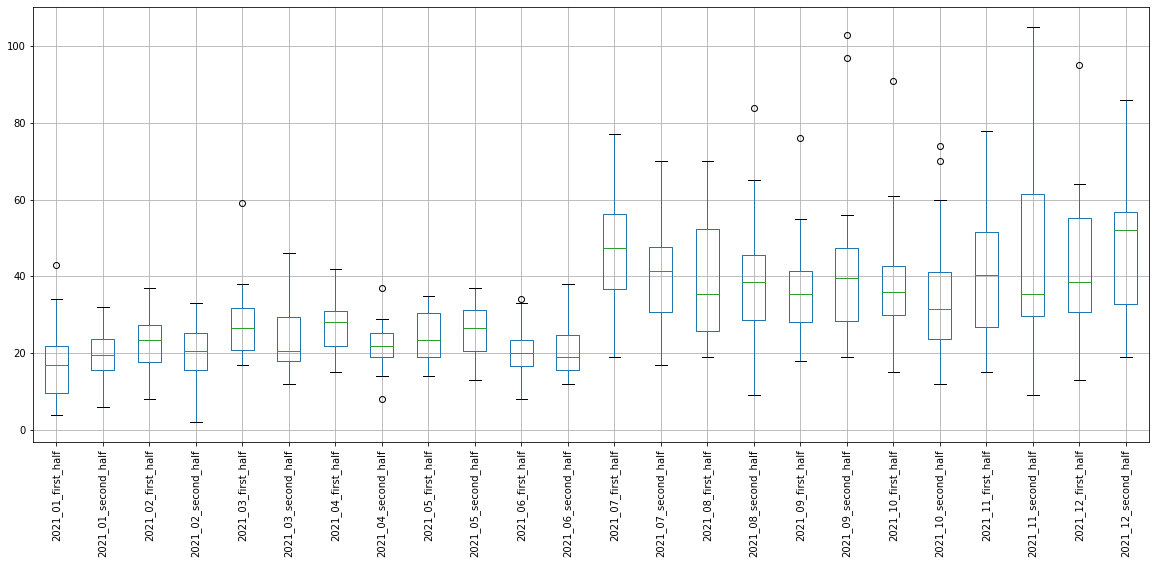

In [5]:
top_5_categories=top_consistent_categories[:5]
df_temp=df_all_samples_bootstrapped.loc[:,top_5_categories]

dff=df_temp.unstack(level=0).stack(level=0).swaplevel().sort_index().copy()
#we need to detremine whether the distribution of count 


for p,df_p in dff.groupby(level=0):
    df_p=df_p.droplevel(0)
    if p.startswith('Restaurants'):
        break
df_p.boxplot(figsize=(20,8),rot=90)
#This is performed just to extract restraunt based dataframes

In [6]:
# for p,df_p in dff.groupby(level=0):
#     print(p)
#     display(df_p)
#     break
    
for r,s in df_p.T.iterrows():
    print(r,s)
    break
    #Samples of count of preference collected for a particular fortnight (timeperiod)
    #ANOVA test check whether the introduction of new predictor is essential/significant or not
    #here new preditor is the timer period fortnights (1...24)
    
    

2021_01_first_half ct_users_0     14.0
ct_users_1     34.0
ct_users_10    19.0
ct_users_11    22.0
ct_users_12    33.0
ct_users_13    19.0
ct_users_14    32.0
ct_users_15     8.0
ct_users_16     5.0
ct_users_17    16.0
ct_users_18    11.0
ct_users_19    17.0
ct_users_2      4.0
ct_users_3      9.0
ct_users_4     22.0
ct_users_5     17.0
ct_users_6      7.0
ct_users_7     19.0
ct_users_8     43.0
ct_users_9     10.0
Name: 2021_01_first_half, dtype: float64


ct_user_1 represents an experiment ran on ~300 samples users of segment_id 24, and it generates a count of number of times a particular product category was chosen




In [7]:
#will run tTest_independednt to check difference in mean between data collected across 24 different fornights
#For now we have 24 sample comprising of 20 value each and we intend to check whether the 24 samples comes from different mean

# anova(np.random.normal(1,size=10),np.random.normal(1,size=10),np.random.normal(1,size=10))
#Anova check on f stat which compares explainability ratio of two models, one with the global mean and other one with localised means
#If fstat is high >>1 then the null hypothesis of ratio being 1 can be rejected 

anova(*list(df_p.T.values))

F_onewayResult(statistic=10.932500307171823, pvalue=4.265314494107939e-31)

In [8]:
#THis anova based test just checks whether the other fortnights values are different from the first one or not\
#Pivot is the first fortnight array
f_stat_jump={}
p_val_jump={}
data_till_date=[]
for ii,(idx,r) in enumerate(df_p.T.iterrows()):
    temp_data=list(r.values)
    if ii==0: 
        data_till_date.extend(temp_data)
        pass
    anova_test=anova(data_till_date,temp_data)
    #This test is run successively on introduction of each new predictor, for example is two fornights are required to explain january count data or can it be explained with one global mean
    f_stat_jump[idx]=anova_test.statistic
    p_val_jump[idx]=anova_test.pvalue
    


In [9]:
data_till_date
list(df_p.T.values)
anova([1,2,3,1,1],[1,2,3,1,1])#F_onewayResult(statistic=0.0, pvalue=1.0)#[10,10,10,30,200,1e1])

import numpy.random as npr

anova(npr.normal(1,1,1000),
npr.normal(10,1,1000))#F_onewayResult(statistic=40642.076891701734, pvalue=0.0)

anova(npr.normal(1,1,1000),
npr.normal(10,1,100))#F_onewayResult(statistic=7660.144181541927, pvalue=0.0) the means are deviated and we sh0uld introduce a new predictor

anova(npr.normal(1,1,1000),
npr.normal(1,1,100),
npr.normal(10,1,100))#F_onewayResult(statistic=3663.7558220163814, pvalue=0.0)

F_onewayResult(statistic=3852.4389008966896, pvalue=0.0)

Text(0.5, 1.0, 'Bootstrap_count')

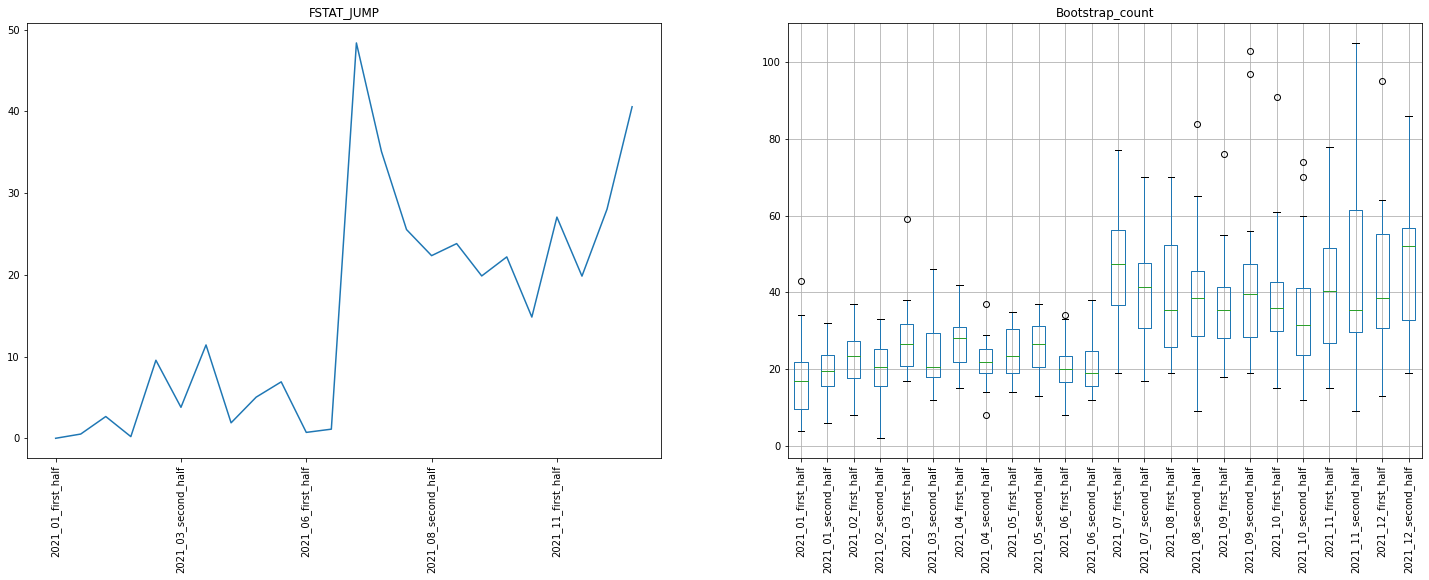

In [10]:
# anova(*list(df_p.T.values)).statistic
_,ax=plt.subplots(1,2,figsize=(25,8))
pd.Series(f_stat_jump).plot(ax=ax[0],rot=90)
ax[0].set_title('FSTAT_JUMP')
df_p.boxplot(rot=90,ax=ax[1])
ax[1].set_title('Bootstrap_count')



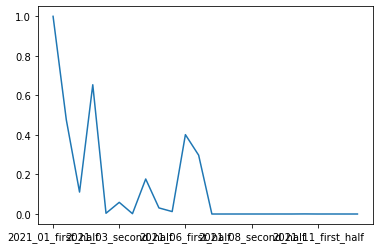

In [11]:
pd.Series(p_val_jump).plot()

In [12]:
# We will apply divide and conquer and then perform this fstat test iteratively

## ANOVA ttest on iterative halves of the data 

In [13]:
lt_tbu=list(range(len(df_p.columns)))

In [34]:
from collections import defaultdict
dict_partition=defaultdict(list)

In [15]:
depth=0
l_pointer=0
r_pointer=23

def partitioner(l_pointer,r_pointer,depth):
  global df_p,dict_partition

  mid_point=int((l_pointer+r_pointer)//2)

  lt_df=df_p.iloc[:,l_pointer:mid_point]
  dict_partition[depth].append(lt_df)

  rt_df=df_p.iloc[:,mid_point:r_pointer]
  dict_partition[depth].append(rt_df)
  return 


In [16]:
# dict_partition
# partitioner(0,23,0)

In [35]:
def partitioner(l_pointer,r_pointer,depth,stop_val=5):
  global df_p,dict_partition

  if depth==stop_val:
    return 

  mid_point=int((l_pointer+r_pointer)//2)

  lt_df=df_p.iloc[:,l_pointer:mid_point]
  dict_partition[depth].append(lt_df)
  partitioner(l_pointer,mid_point,depth+1)

  rt_df=df_p.iloc[:,mid_point:r_pointer]
  dict_partition[depth].append(rt_df)
  partitioner(mid_point,r_pointer,depth+1)

  return 

dict_partition=defaultdict(list)
partitioner(0,23,0)#Be mindful of the stop value, In this cache we have stored data till depth of 4

In [36]:
len(dict_partition[0]),len(dict_partition[1])

(2, 4)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


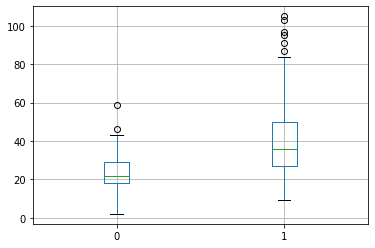

In [37]:
depth=1
plot=True

fStat_depth=defaultdict(float)
pval_depth=defaultdict(float)


def analyse_fStat(depth,plot=True):
  global fStat_depth,pval_depth,dict_partition
  lt_lt_bootstraps=[]

  for temp_df in dict_partition[depth]:
    lt_lt_bootstraps.append(temp_df.values.reshape(-1,))
  anova_test=anova(*lt_lt_bootstraps)

  fStat_depth[depth]=anova_test.statistic
  pval_depth[depth]=anova_test.pvalue

  if plot:
    pd.DataFrame(lt_lt_bootstraps).T.boxplot()
  return 


# temp_df=dict_partition[1][0]
# temp_df.values.reshape(-1,)
analyse_fStat(depth=0)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


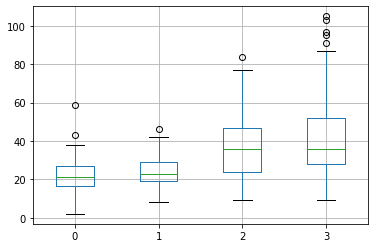

In [38]:
analyse_fStat(depth=1)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


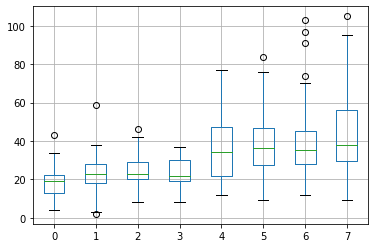

In [39]:
analyse_fStat(depth=2)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


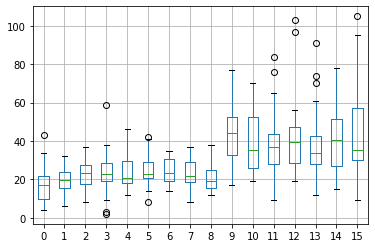

In [41]:
analyse_fStat(depth=3)
# dict_partition[10]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


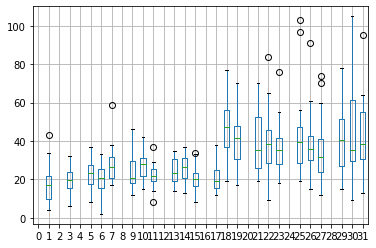

In [42]:
analyse_fStat(depth=4)#Slightly irrelevant as we initially have just 24 partitions of the of columns in the parent dataframe


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f10437f9b90>,
      dtype=object)

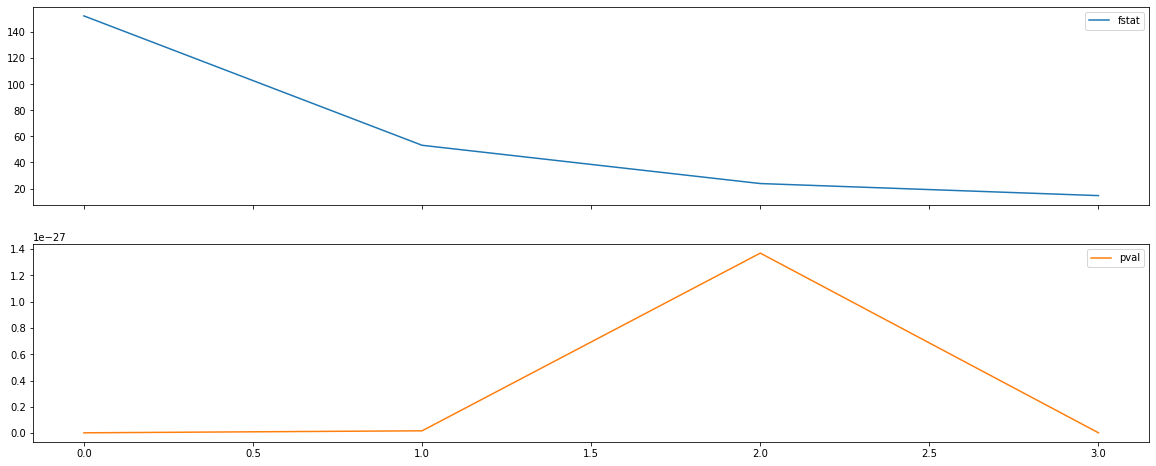

In [45]:
pd.DataFrame(
    {
      'fstat':fStat_depth,
     'pval': pval_depth
    }
          ).plot(figsize=(20,8),subplots=True)#The pval  (which is always closer to 0 for all depths suggest that the partition is significant from the first depth itself)

# ROUGH WORK

In [68]:
anova(*lt_lt_bootstraps)

F_onewayResult(statistic=53.174794224077566, pvalue=1.7285298838953773e-29)

In [73]:
len(lt_lt_bootstraps)
pd.DataFrame(lt_lt_bootstraps)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,14.0,11.0,28.0,3.0,31.0,34.0,32.0,14.0,23.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26.0,35.0,25.0,22.0,37.0,21.0,24.0,28.0,21.0,16.0,...,21.0,32.0,24.0,23.0,20.0,29.0,23.0,22.0,27.0,22.0
2,16.0,55.0,17.0,70.0,47.0,33.0,17.0,57.0,70.0,36.0,...,43.0,24.0,41.0,32.0,24.0,36.0,38.0,29.0,54.0,37.0
3,40.0,36.0,45.0,45.0,38.0,63.0,30.0,91.0,12.0,51.0,...,35.0,36.0,27.0,13.0,39.0,30.0,34.0,73.0,30.0,48.0
